In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from pprint import pprint
import matplotlib
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import os, sys

print(os.getcwd())
repo_path = os.path.join(os.getcwd(), "../..")

df = pd.read_csv(os.path.join(repo_path, 'output.csv'))
print(df.head())

/data/a.saricaoglu/repo/RubinsForge/OpSim/scripts
        ra       dec                          name  \
0  0.02540  21.64150                    J0000+2138   
1  0.03083 -33.68306              J000007.4-334059   
2  0.03524   2.44944             HSCJ000008+022658   
3  0.03690  21.28410                    J0000+2117   
4  0.05013 -31.16204  KiDSDR4J000012.031-310943.35   

                         alt_name       flag  score  image_sep info  n_img  \
0                             NaN  CANDIDATE   1.88        NaN  NaN    NaN   
1                             NaN  CANDIDATE   1.00        NaN  NaN    NaN   
2  J00h00m08.4576s +02d26m57.984s  CANDIDATE   1.75        NaN  NaN    NaN   
3                             NaN  CANDIDATE   1.88        NaN  NaN    NaN   
4                             NaN  CANDIDATE   2.00        NaN  NaN    NaN   

  image_conf   lens_type source_type contaminant_type  lens_spec_z  \
0         []  ['GALAXY']          []               []        0.503   
1         []  ['

In [37]:
coordinates = []
for index, row in df.iterrows():
    coord = SkyCoord(ra=row['ra'] * u.degree, dec=row['dec'] * u.degree, frame='icrs')
    coordinates.append(coord)

coordinates = SkyCoord(coordinates)

print(f"Number of total lenses: {len(coordinates)}")

Number of total lenses: 17836


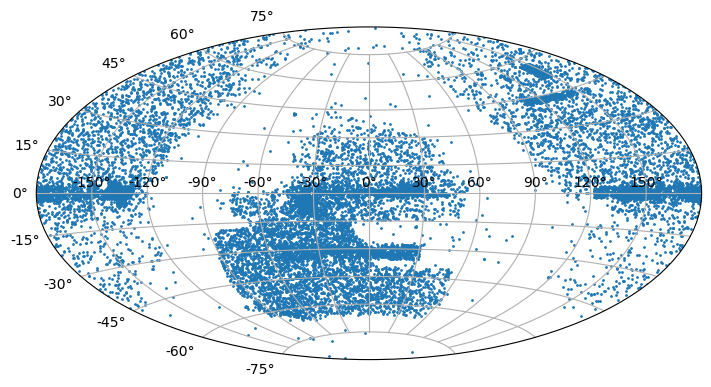

In [38]:
plt.figure(figsize=(7,4), constrained_layout=True)
ax = plt.subplot(111, projection='aitoff')
ax.scatter(-coordinates.ra.wrap_at(180 * u.degree).radian, coordinates.dec.radian, s=1)  
plt.grid(True)
plt.show()

Bryce's code has this transformation on RA axis for some reason? Check if they match actually.

In [43]:
# Here we pick 'GALAXY' for both source and lens type, and plot these lenses.
ggsl_coordinates = []
for index, row in df.iterrows():
    if (row['lens_type'] == "['GALAXY']") & (row['source_type'] == "['GALAXY']"):
        coord = SkyCoord(ra=row['ra'] * u.degree, dec=row['dec'] * u.degree, frame='icrs')
        ggsl_coordinates.append(coord)

ggsl_coordinates = SkyCoord(ggsl_coordinates)
print(f"Number of GGSL lenses: {len(ggsl_coordinates)}")

print(ggsl_coordinates.ra.degree, ggsl_coordinates.dec.degree)
print(ggsl_coordinates[0])

Number of GGSL lenses: 3209
[3.5240000e-02 1.0646000e-01 2.1573000e-01 ... 3.5995245e+02 3.5995886e+02
 3.5999307e+02] [ 2.44944 28.53665 -0.49349 ... -0.98702 25.94551 21.4087 ]
<SkyCoord (ICRS): (ra, dec) in deg
    (0.03524, 2.44944)>


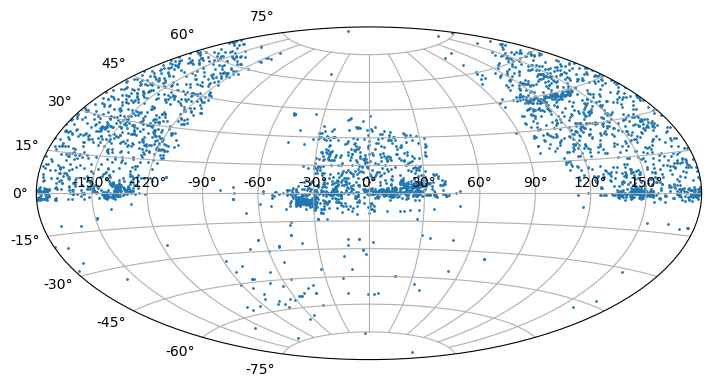

In [40]:
plt.figure(figsize=(7,4), constrained_layout=True)
ax = plt.subplot(111, projection='aitoff')
ax.scatter(-ggsl_coordinates.ra.wrap_at(180 * u.degree).radian, ggsl_coordinates.dec.radian, s=1)  
plt.grid(True)
plt.show()

In [44]:
# Now, we create a fits file for GGSL coordinates

import astropy.io.fits as fits
from astropy.table import Table

fits_filename = os.path.join(repo_path, 'ggsl_coordinates.fits')

hdu = fits.PrimaryHDU()
hdul = fits.HDUList([hdu])
hdul.writeto(fits_filename, overwrite=True)
hdu = fits.open(fits_filename, mode='update')

table = fits.BinTableHDU(Table(data=[ggsl_coordinates.ra.degree, ggsl_coordinates.dec.degree], names=['RA', 'DEC'], units=['deg', 'deg']))
hdu.append(table)
hdu.flush()
